In [1]:
import sys, os, cv2
import numpy as np
module_rootdir = '../../..'
dataset_rootdir = '../../../../'
label_rootdir = module_rootdir
sys.path.append(module_rootdir)

import config_dataset
from modules.dataset_utils.bdd_dataset_utils import constants
from modules.dataset_utils.bdd_dataset_utils.remapped_bdd_utils import load_ground_truths
from modules.augmentation.lib.geometric_transform import scaled_random_crop, resize_with_warping
from modules.augmentation.lib.mosaic_transform import mosaic_1x2, mosaic_2x1, mosaic_2x2
from modules.plot.viz_annotation import draw_bbox_on_img_data

In [2]:
sel_train_labels_file = config_dataset.bdd_sel_train_labels_file
train_images_dir = config_dataset.bdd_train_images_dir

selected_labels = load_ground_truths(
    label_rootdir,
    sel_train_labels_file, 
    dataset_rootdir,
    train_images_dir, 
    verbose=True)

Load JSON file .. please wait
annotations from 1/69863 aggregated
annotations from 2001/69863 aggregated
annotations from 4001/69863 aggregated
annotations from 6001/69863 aggregated
annotations from 8001/69863 aggregated
annotations from 10001/69863 aggregated
annotations from 12001/69863 aggregated
annotations from 14001/69863 aggregated
annotations from 16001/69863 aggregated
annotations from 18001/69863 aggregated
annotations from 20001/69863 aggregated
annotations from 22001/69863 aggregated
annotations from 24001/69863 aggregated
annotations from 26001/69863 aggregated
annotations from 28001/69863 aggregated
annotations from 30001/69863 aggregated
annotations from 32001/69863 aggregated
annotations from 34001/69863 aggregated
annotations from 36001/69863 aggregated
annotations from 38001/69863 aggregated
annotations from 40001/69863 aggregated
annotations from 42001/69863 aggregated
annotations from 44001/69863 aggregated
annotations from 46001/69863 aggregated
annotations from 4

## Mosaic 2 x 2 with cropping

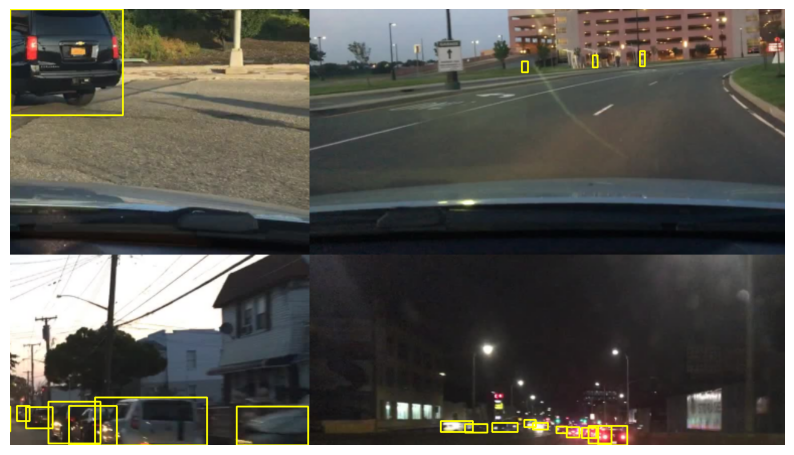

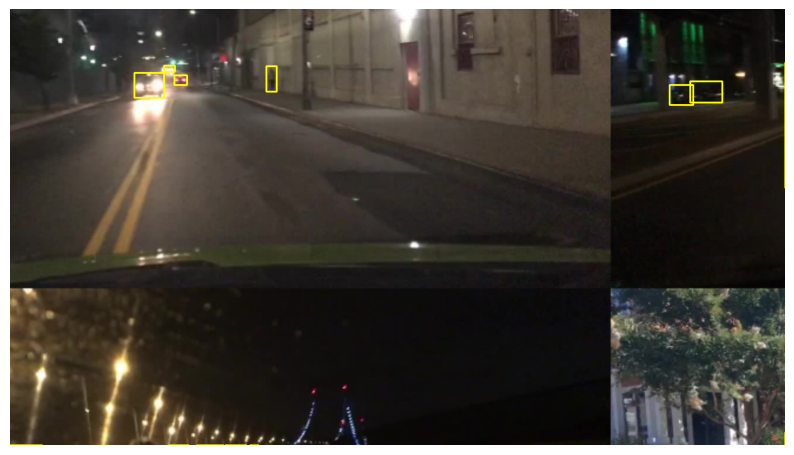

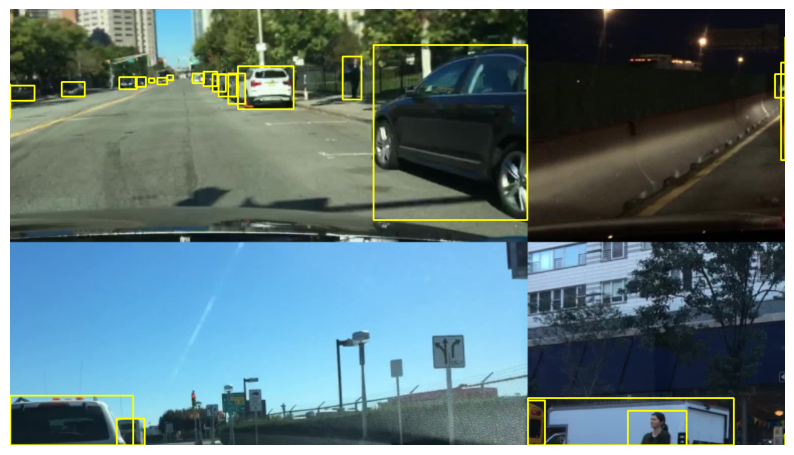

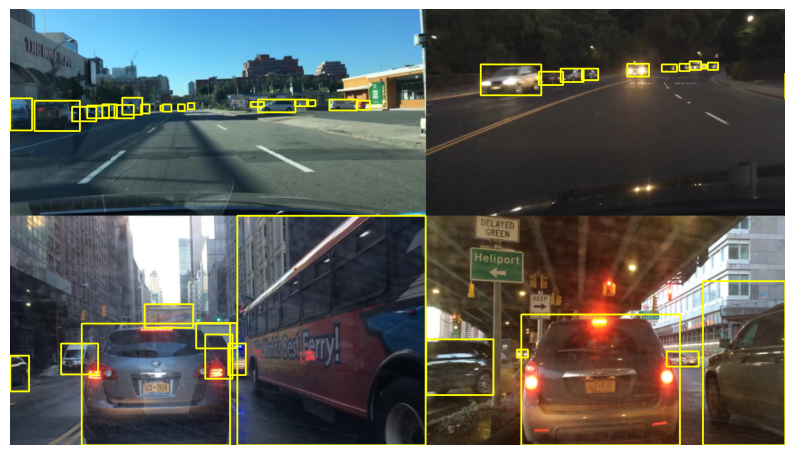

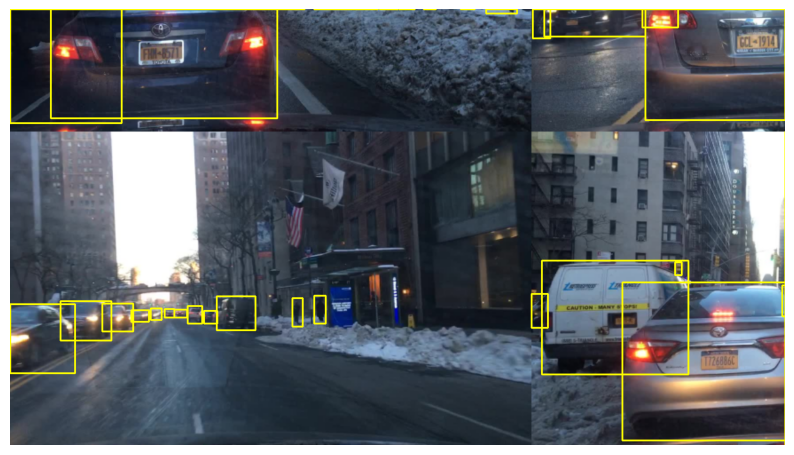

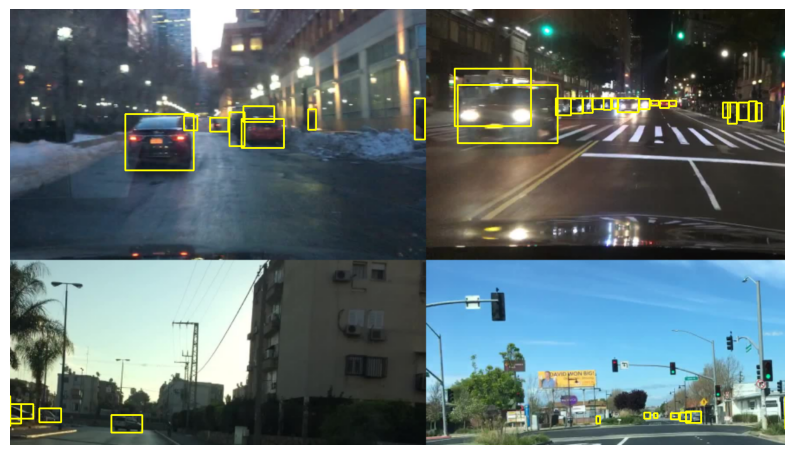

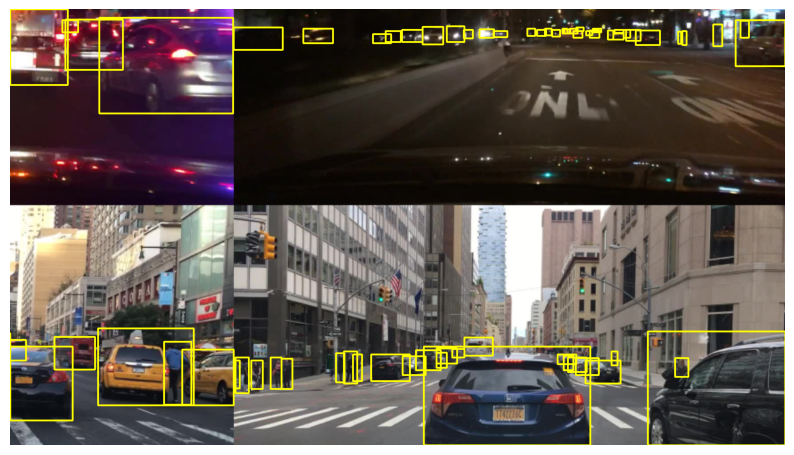

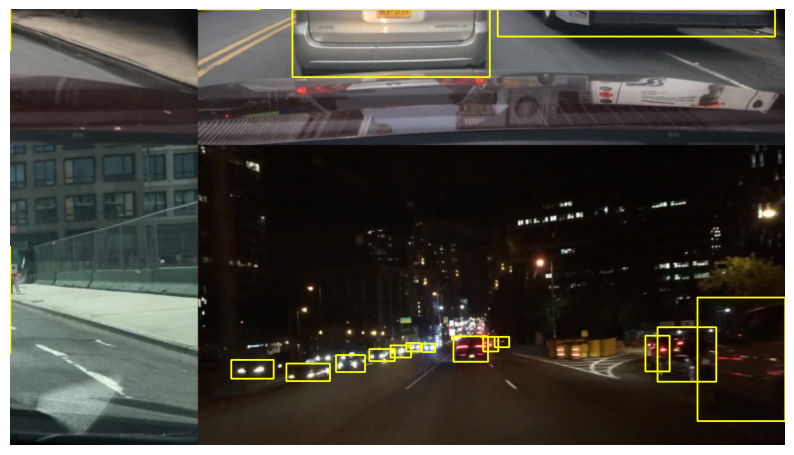

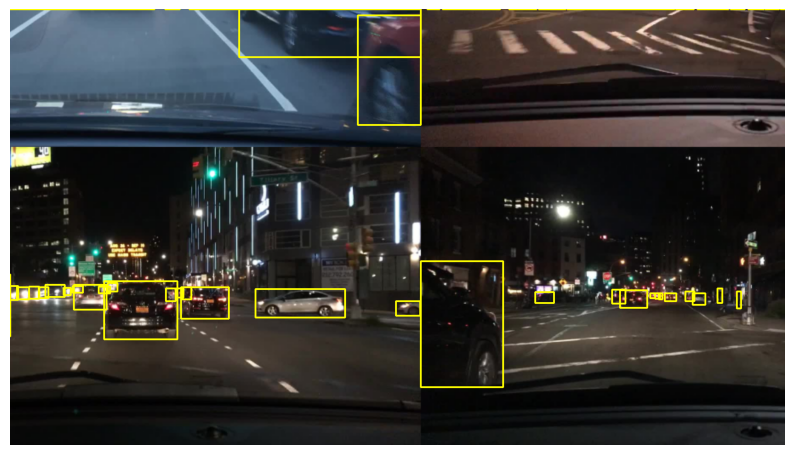

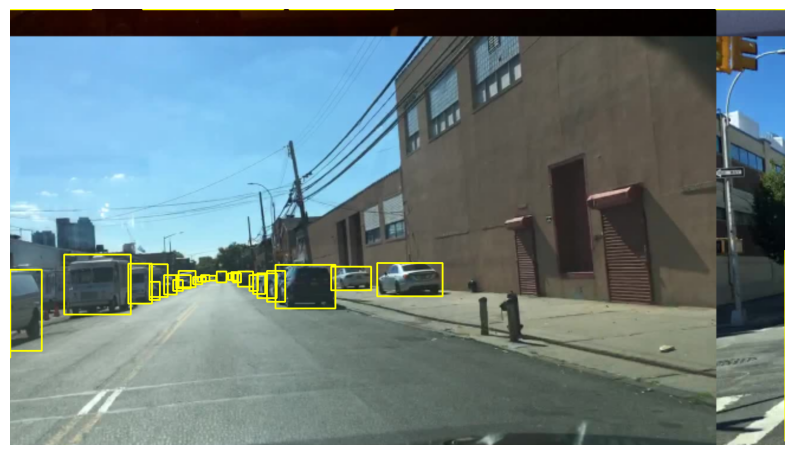

In [3]:
mosaic_2x2_obj = mosaic_2x2(img_h=constants._IMG_H_, img_w=constants._IMG_W_)

for i in range(10):

    idx_list = [4*i + j for j in range(4)]
    image_list = []
    bbox_list = []
    for idx in idx_list:
        image = cv2.imread(selected_labels[idx]['img_path'])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        bbox = selected_labels[idx]['boundingBox2D']
        if bbox.shape[0] == 0: bbox = np.zeros(shape=(0, 4), dtype=np.float32)
        image, bbox = resize_with_warping(image, bbox, constants._IMG_H_, constants._IMG_W_)
        image_list.append(image)
        bbox_list.append(bbox)
    classlabel_list = [ selected_labels[idx]['objCategoryid'] for idx in idx_list]
    
    new_img, new_bbox, new_classlabel = mosaic_2x2_obj.create_mozaic(
        image_list=image_list, 
        bbox_list=bbox_list, 
        classlabel_list=classlabel_list)

    scale = np.random.uniform(low=0.5, high=1.0)  
    new_img, new_bbox = scaled_random_crop(new_img, new_bbox, scale)   

    draw_bbox_on_img_data(new_img, new_bbox, figsize=(10,8))